**Nombre: Arturo Garza Campuzano**

**Matrícula: A00828096**

# Implementación de una técnica de aprendizaje máquina sin el uso de un framework

En esta implementación se progama uno de los algortimos vistos en el módulo sin usar ningina bilioteca o framework de aprendizaje máquina, ni de estadística avanzada. Lo que se busca es la implementación de un algortimo, sin que se importe un algoritmo ya implementado.

En este caso, la implementación del algoritmo se prueba con un conjunto de datos sobre anuncios de redes sociales que describen a los usuarios, si es que han comprado un producto haciendo click en los anuncios que se les muestran (Social_Network_Ads.csv).

El modelo que se eligió para esta implementación es la **regresión logística**, la cual se utilizará para predecir si es que un usuario va a comprar un producto o no.

In [3]:
# Importación de librerias
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Lectura del archivo Social_Network_Ads.csv para extraer dataset
social_df = pd.read_csv('/content/sample_data/Social_Network_Ads.csv') # Cambiar routeo si es necesario
social_df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## Mapa de calor

Con el fin de elegir las **variables de interés** para la implementación del modelo se genera un mapa de calor para revisar la correlación entre todas las variables (atributos) presentes en el conjunto de datos.

<ipython-input-5-92fc80d98e3c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = social_df.corr()
<ipython-input-5-92fc80d98e3c>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask=np.zeros_like(corr, dtype=np.bool),


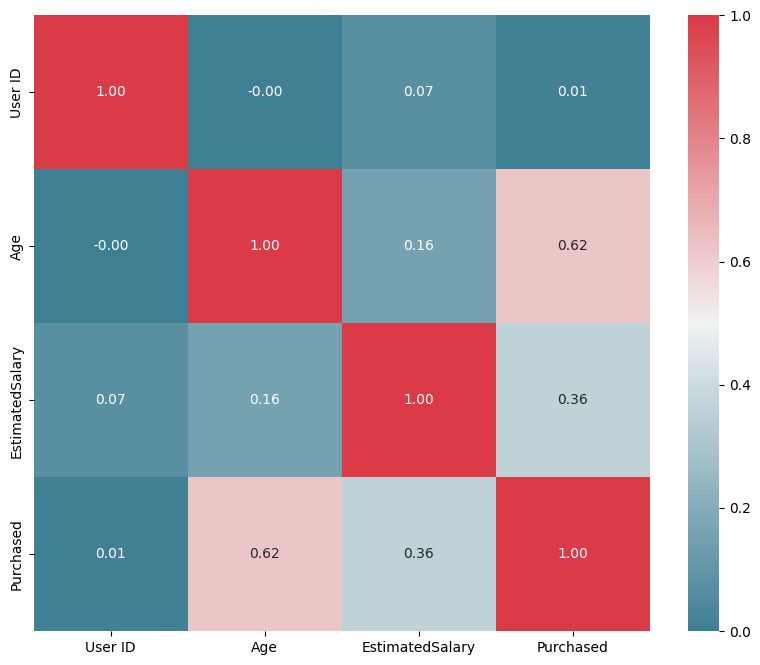

In [5]:
f, ax = plt.subplots(figsize=(10, 8))
corr = social_df.corr()

sns.heatmap(corr,
            annot=True,
            fmt=".2f",
            mask=np.zeros_like(corr, dtype=np.bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

plt.show()

Por lo tanto, nuestras **variables de interés** son:
* Edad (Age): Vairbale independiente.
* Comprado (Purchased): Variable dependiente.

Esto se debe a la correlación moderada entre estas dos variables. Además, considerando que queremos predecir si el usuario comprara o no un producto necesitamos la variable "Comprado" para implementar el modelo y realizar la predicción.

## Diagrama de dispersión

Para visualizar la correlación entre las variables edad y comprado se genera un **diagrama de dispersión** para determinar si es factible o no implementar regresión logística para estas variables.

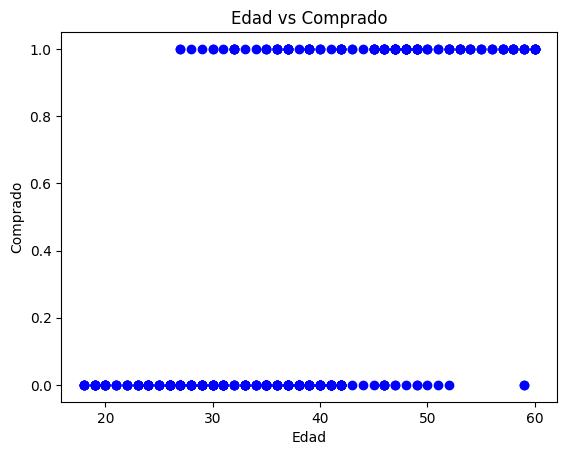

In [6]:
'''De acuerdo al mapa, la variable que tiene más correlación con la compra es
la edad del usuario. Para visualizar mejor la relación entre estas dos variables
se genera una gráfica de Edad vs. Comprado.'''

#Vairbales
age = social_df['Age']
purshased = social_df['Purchased']

# Crea un diagrama de dispersión
plt.scatter(age, purshased, label='Data Points', color='blue')

# Add labels and title
plt.xlabel('Edad')
plt.ylabel('Comprado')
plt.title('Edad vs Comprado')

# Muestra el diagrama
plt.show()

Se puede contemplar en la gráfica que hay un considerable desfase entre los que compraron y los que no compraron considerando su edad, lo cual nos indica que es posible utilizar el modelo de **regresión logística** y crear una función de hipótesis (sigmoide).

## Regresión logística

Lo primero que se debe hacer es cargar los datos (listas) y los valores iniciales de los hiper-parámetros.

In [7]:
# Crear lista con los valores de la variable independiente (maxHR)
age = social_df['Age']
# Crear lista con los valores de la variable dependiente (HeartDisease: no = 0, yes = 1)
purshased = social_df['Purchased']
# Crear lista con los hiper-parámetros iniciales (thetas)
theta0 = 1
theta1 = 1
theta = [theta0, theta1]
# Cargar el valor del learning rate (alpha)
alpha = 0.1

También se necesita una alternativa que permita estimar fácilmente la variable dependiente y el total de muestras. Dado que se implementará la función logística, se ocupa la función exponencial, por lo que se requiere el módulo **math**. También se necesita una variable para el total de iteraciones.

In [8]:
# Crear función lambda para la función de hipótesis
h = lambda x,theta: 1 / (1 + math.exp(-(theta[0] + theta[1] * x)))
# Calcular el total de muestras a partir de los datos (n)
n = len(social_df)
# Definir total de iteraciones a ejecutar
i = 10000

En cada iteración se debe calcular el valor de la derivada de la **función de costo**, que se obtiene a partir de los datos estimados, $h_\theta(x_i)$, y reales, $y_i$ (recuerde que los estimados se obtienen con la función de hipótesis de la regresión logística):

$\frac{∂J_{θ}}{∂θ_0} = \frac{1}{n}\sum_{i=1}^{n}(h_θ(x_i)-y_i)$

$\frac{∂J_{θ}}{∂θ_1} = \frac{1}{n}\sum_{i=1}^{n}(h_θ(x_i)-y_i)x_i$

Además, se deben actualizar los valores de los hiper-parámetros, recordando que $\theta_j=\theta_j-\alpha \frac{∂J_{θ}}{∂θ_j}$:

In [9]:
# Seleccionar la muestra a utilizar (Attendance o Homework)
size = len(social_df)//2
x = age[0:size]
y = purshased[0:size]

# Implementar ciclo para iteraciones
for a in range(i):
  # Crear acumuladores
  delta0 = []
  delta1 = []
  # Barrer muestras
  for xi,yi in zip(x,y):
    pred = h(xi, theta)
    # Calcular delta para theta0 y para cada muestra
    delta0.append(pred-yi)
    # Calcular delta para theta1 y para cada muestra
    delta1.append((pred-yi)*xi)

  # Calcular sumatorias y promedio
  dJt0 = 1/n*sum(delta0)
  dJt1 = 1/n*sum(delta1)

  # Actualizar theta0
  theta0 = theta0 - (alpha*dJt0)
  # Actualizar theta1
  theta1 = theta1 - (alpha*dJt1)

  theta = [theta0, theta1]

Graficamos la **función de hipótesis** resultante, con los valores nuevos de theta.

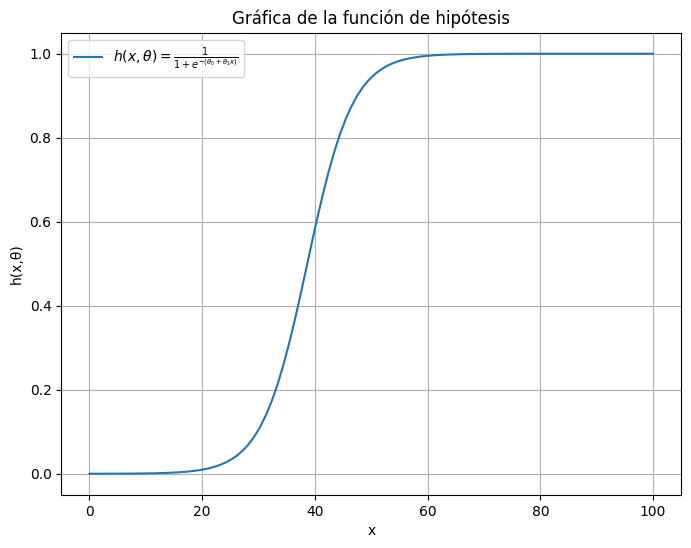

In [10]:
# Genera valores de x
x_values = np.linspace(0, 100, 100)

# Calcular y usar los valores de la funcion lambda
y_values = [h(x, theta) for x in x_values]

# Crear la gráfica
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label=r'$h(x,\theta) = \frac{1}{{1 + e^{-(\theta_0 + \theta_1 x)}}}$')
plt.title('Gráfica de la función de hipótesis')
plt.xlabel('x')
plt.ylabel('h(x,θ)')
plt.grid(True)
plt.legend()
plt.show()

## Evaluación del modelo

Se agrupan las **predicciones** de nuestro modelo utilizando la nueva función de hipótesis.

In [11]:
# Inicializar acumuladores
pred = []
n = len(age)

# Barrer la entrada y estimar las salidas:
for i in range(n):
  # Usar función de hipótesis
  pred_temp = h(age[i], theta)

  # Redondear para estimar clase
  pred_temp = round(pred_temp)

  # Acumular
  pred.append(pred_temp)

Para estimar qué tan bueno es el clasificador, se genera la **matriz de confusión** y las correspondientes **métricas**:

$accuracy = \frac{VP+VN}{VP+VN+FP+FN}$

$precision = \frac{VP}{VP+FP}$

$recall = \frac{VP}{VP+FN}$

$F1 = \frac{2\cdot precision \cdot recall}{precision+recall}$

In [12]:
# Inicializar contadores para VP, FP, VN, FN (modelo 1)
vp = 0
fp = 0
vn = 0
fn = 0

# Barrer datos reales y predicciones (modelo 1)
for i in range(n):
  # Analizar opciones para dato real == 1
  if purshased[i] == 1:
    # Analizar si predicción == 1 (VP) o == 0 (FN)
    if pred[i] == 1:
      vp += 1
    else:
      fn += 1
  # Analizar opciones para dato real == 0
  else:
    # Analizar si predicción == 1 (FP) o == 0 (VN)
    if pred[i] == 1:
      fp += 1
    else:
      vn += 1

# Métricas
a = (vp + vn)/(vp + vn + fp + fn)
p = vp / (vp + fp)
r = vp / (vp + fn)
f1 = 2*((p*r)/(p+r))

# Imprimir resultados
print('Regresión logística')
print(f"Acurracy: {a}")
print(f"Presicion: {p}")
print(f"Recall: {r}")
print(f"F1: {f1}")

Regresión logística
Acurracy: 0.765
Presicion: 0.6384180790960452
Recall: 0.7902097902097902
F1: 0.70625


Por lo tanto, el modelo de **regresión logísitica** implementado sobre el conjunto de datos *Social_Network_Ads.csv* cuenta con las siguientes métricas:

* **Acurracy = 76.5 %**
* **Presicion = 63.8 %**
* **Recall = 79.0 %**
* **F1 = 70.6 %**